Steps:-
0. Preproceess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the valuea
3. Train test split
4. Train the model
5. Evalute the model/model selection
6. Deploy the model

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
#removing the unamed row
df = df.iloc[:,1:]

In [7]:
#the unamed column is now removed.
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Text(0, 0.5, 'IQ')

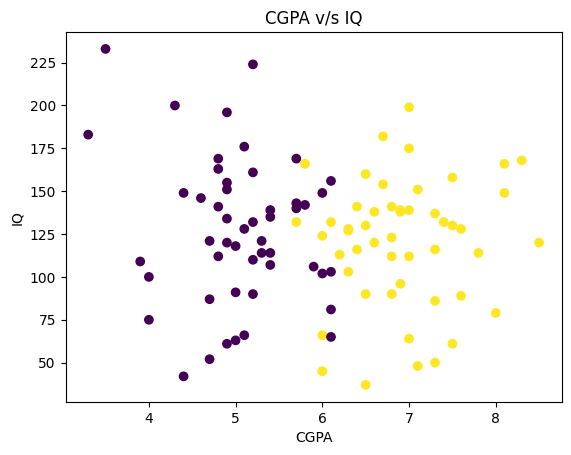

In [8]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.title('CGPA v/s IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [9]:
#storing input and output cols in variables
x = df.iloc[:,0:2]
y = df.iloc[:,-1:]

In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


Train-test split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [13]:
x_train

,cgpa,iq
26,7.0,199.0
20,6.6,120.0
27,6.0,124.0
97,6.7,182.0
65,8.1,166.0
...,...,...
28,5.2,90.0
44,7.5,61.0
9,5.1,66.0
51,4.8,141.0


In [14]:
y_train

,placement
26,1
20,1
27,1
97,1
65,1
...,...
28,0
44,1
9,0
51,0


In [15]:
scaler = StandardScaler()


In [16]:
x_train = scaler.fit_transform(x_train)

In [17]:
x_train

array([[ 0.88433419,  1.8450204 ],
       [ 0.53563725, -0.12643963],
       [ 0.01259183, -0.02661887],
       [ 0.62281148,  1.42078216],
       [ 1.84325079,  1.02149912],
       [ 1.1458569 ,  0.2977986 ],
       [ 0.18694031, -0.30112596],
       [ 0.62281148,  0.72203684],
       [-0.94632476, -0.12643963],
       [-0.94632476,  0.64717127],
       [ 0.70998572, -0.32608115],
       [ 1.84325079,  0.59726089],
       [ 0.97150843, -1.92321333],
       [ 0.27411454,  0.0482467 ],
       [-0.24893087,  0.44752974],
       [ 0.09976607, -1.09969205],
       [ 0.70998572, -0.87509534],
       [ 0.88433419,  1.24609583],
       [-0.51045358, -0.4508571 ],
       [-0.0745824 , -0.47581229],
       [ 0.70998572,  0.39761936],
       [ 1.1458569 , -0.9749161 ],
       [-0.68480205,  0.89672317],
       [-0.68480205,  2.46890015],
       [ 1.23303114,  0.17302265],
       [ 0.09976607, -0.55067786],
       [ 0.09976607, -1.49897509],
       [ 1.32020537,  0.8218576 ],
       [ 0.01259183,

In [18]:
x_test = scaler.transform(x_test) 

In [19]:
x_test

array([[ 1.40737961, -0.90005053],
       [ 0.79715996,  0.34770898],
       [ 0.36128878, -0.22626039],
       [-0.85915052, -1.54888547],
       [ 0.88433419, -0.32608115],
       [-0.94632476,  0.22293303],
       [-0.59762782, -0.27617077],
       [ 0.97150843,  0.64717127],
       [-0.16175664,  0.42257455],
       [-1.38219594, -2.07294447]])

Training the model

In [20]:
clf= LogisticRegression()

In [21]:
#model training
clf.fit(x_train, y_train)

C:\Users\HRISHAV RAJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluating the model

In [22]:
y_pred = clf.predict(x_test)

In [23]:
y_test

,placement
42,1
60,1
13,1
7,0
29,1
40,0
46,0
21,1
4,0
96,0


In [24]:
accuracy_score(y_test, y_pred)

1.0

<Axes: >

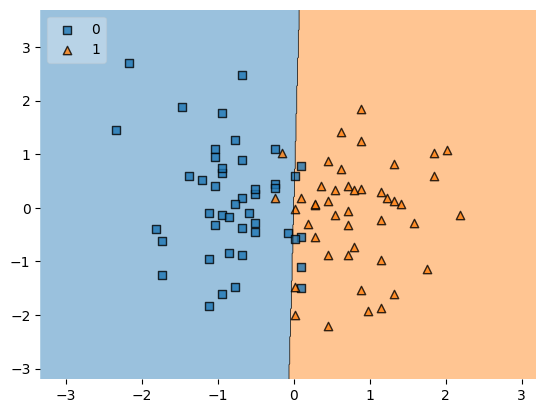

In [29]:
plot_decision_regions(x_train, y_train.values.ravel(), clf=clf, legend=2)

In [31]:
pickle.dump(clf, open('model.pkl','wb'))